#  Sprawozdanie

Wojciech Dolata, nr indeksu: 297195

## Potrzebne importy, aliasy i funkcje

In [24]:
import numpy
import math
import time
import matplotlib.pyplot as plt
import scipy.optimize as scp

def f(x):
    return math.exp(-2*x) + math.pow(x,2) - 1

def f1(x):
    return -2*math.exp(-2*x) + 2*x

def f2(x):
    return 4*math.exp(-2*x) + 2

## Zadanie 1

Wykresy funkcji

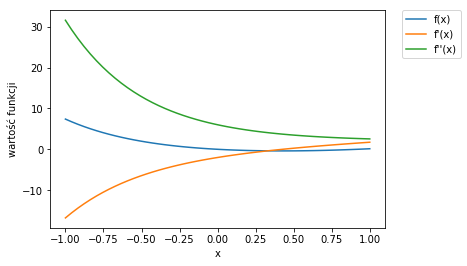

In [34]:
x = numpy.linspace(-1,1)
y = []
for i in x:
    y.append(f(i))
y2 = []
for i in x:
    y2.append(f1(i))
y3 = []
for i in x:
    y3.append(f2(i))
plt.plot(x,y,label='f(x)')
plt.plot(x,y2,label="f'(x)")
plt.plot(x,y3,label="f''(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.ylabel('wartość funkcji')
plt.show()

Miejsce zerowe f(x) w okolicach zera.

## Zadanie 2

Metoda Bisekcji

In [22]:
def bisec(func,beg,end,d,maxite):
    begite=maxite
    if(f(beg)*f(end)>0):
        print("zle przedzialy")
        return 0
    while (math.fabs(end-beg)>=d and maxite>0):
        mid = beg+(end-beg)/2
        #print(func(mid))
        if(func(beg)*func(mid)<0):
            end = mid
        else:
            beg = mid
        maxite = maxite -1
    return (beg,begite-maxite)

curt = time.clock()
(wynik,itenumBisec)=bisec(f,-1.0,0.4,10**-10, 10000)
curt2 = time.clock()
wynikscp = scp.bisect(f,-1.0,0.4,xtol=10**-10,maxiter=10000)
curt3 = time.clock()

print(wynik)
print(wynikscp)
timeBisec = str(curt2-curt)

print(str(curt2-curt)+ "  <--- moj czas")
print(str(curt3-curt2)+ "  <--- ich czas")

-3.492461240840937e-11
-3.4924659989396135e-11
0.0001334393591605476  <--- moj czas
0.00013887933346268255  <--- ich czas


## Zadanie 3

Metoda Newtona(stycznych)

In [17]:
def newton(func, beg, end, d, maxite):
    x=0
    xt=beg
    begite=maxite
    if(f(beg)*f2(beg)>0):
        xt=beg
    while(math.fabs(f(x)-f(xt))>=d and maxite>0):
        x=xt
        xt=x-f(x)/f1(x)
        maxite -= 1
    return (xt,begite-maxite)

curt = time.clock()
(wynik,itenumNewton)=newton(f,-1.0,0.4,10**-10, 10000)
curt2 = time.clock()
wynikscp = scp.newton(f,-1.0,tol=10**-10,maxiter=10000)
curt3 = time.clock()

print(wynik)
print(wynikscp)

timeNewton = str(curt2-curt)

print(str(curt2-curt)+ "  <--- moj czas")
print(str(curt3-curt2)+ "  <--- ich czas")

-5.753992934998626e-18
-4.115383249855085e-18
0.00015615925053680257  <--- moj czas
9.823952836995886e-05  <--- ich czas


## Zadanie 4

Metoda Eulera(siecznych)

In [18]:
def euler(func,beg,end,d,maxite):
    x0=end
    x1=beg
    x2=end
    begite=maxite
    while(math.fabs(x2-x1)>=d and maxite>0):
        x0=x1
        x1=x2
        x2=x1-(f(x1)*(x1-x0))/(f(x1)-f(x0))
        maxite-=1
    return (x2,begite-maxite)

curt = time.clock()
(wynik,itenumEuler)=euler(f,-1.0,0.4,10**-10, 10000)
curt2 = time.clock()
wynikscp = scp.newton(f,-1.0,tol=10**-10,maxiter=10000)
curt3 = time.clock()

print(wynik)
print(wynikscp)

timeEuler = str(curt2-curt)

print(str(curt2-curt)+ "  <--- moj czas")
print(str(curt3-curt2)+ "  <--- ich czas")

-1.1936864184518318e-17
-4.115383249855085e-18
0.00011135946533613605  <--- moj czas
0.00014847928741801297  <--- ich czas


Porównanie ilości iteracji i czasów wykonania.

In [23]:
print("Bisekcja:")
print("Iteracje: " + str(itenumBisec))
print("Czas: " + str(timeBisec))
print("Styczne:")
print("Iteracje: " + str(itenumNewton))
print("Czas: " + str(timeNewton))
print("Sieczne:")
print("Iteracje: " + str(itenumEuler))
print("Czas: " + str(timeEuler))

Bisekcja:
Iteracje: 34
Czas: 0.0001334393591605476
Styczne:
Iteracje: 8
Czas: 0.00015615925053680257
Sieczne:
Iteracje: 13
Czas: 0.00011135946533613605
